In [5]:
# Part 1: Understanding Product Categories
# Frequency Tables:
# Generate a frequency table for the product category.

In [6]:
# Importer les bibliothéque 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [7]:
#Display DF 
url = "/Users/redarerizani/Desktop/ironhack/Week 4 - EDA and Inferential Stats/LABS/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
df.shape

(2443651, 9)

In [9]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [10]:
frequency_table = df['category'].value_counts(ascending=False)
frequency_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Skin Care'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Hair Care'),
  Text(9, 0, 'Fragrances')])

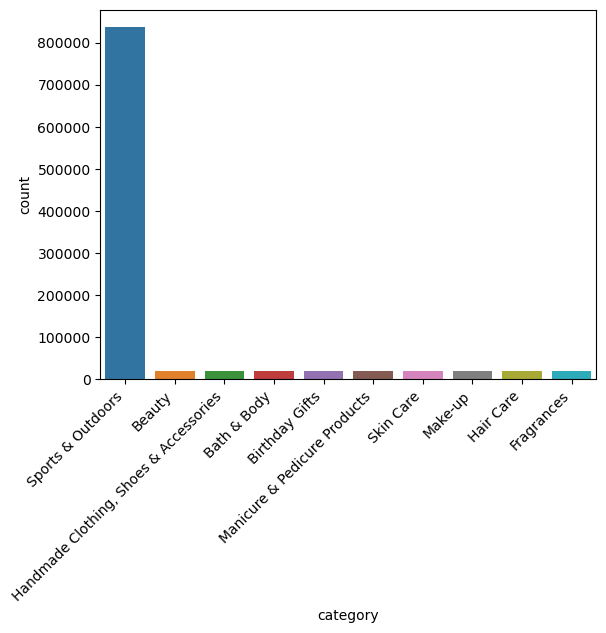

In [11]:
#2. Visualizations:
#Display the distribution of products across different categories using a bar chart. 
#If you face problems understanding the chart, do it for a subset of top categories.
top_categories = df['category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories)
plt.xticks(rotation=45, ha='right')


<Axes: ylabel='count'>

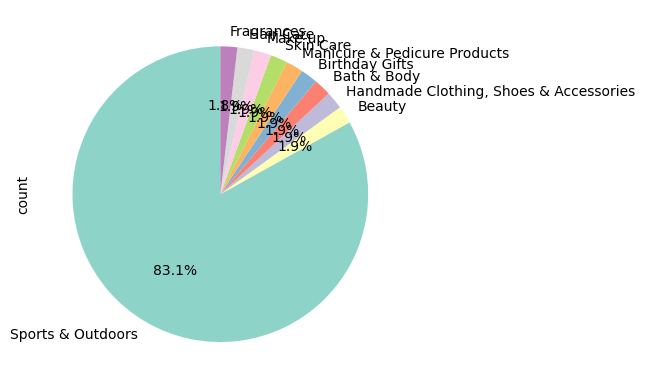

In [12]:
#2 visualize their proportions using a pie chart. Does any category dominate the listings?
top_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

#sports & outdooors is dominate category 

In [13]:

#Part 2: Delving into Product Pricing
#1 Measures of Centrality: 
# Calculate the mean, median, and mode for the price of products.
mean_price = round(df['price'].mean(), 2)
median_price = df['price'].median()
mode_price = df['price'].mode()

display (mean_price, median_price, mode_price)

89.24

19.09

0    9.99
Name: price, dtype: float64

In [14]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?
#la moyenne est trés grande comparé au mode 

In [15]:
# Measures of Dispersion:
#Determine the variance, standard deviation, range, and interquartile range for product price.

variance_price = round(df['price'].var(),2)
std_dev_price = round(df['price'].std(),2)
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

display(variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price)

119445.49

345.61

0.0

100000.0

100000.0

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

In [16]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?
# le range est beaucoup plus grand que le standard deviance cela signifie y a des valeur ++

<Axes: xlabel='price', ylabel='Count'>

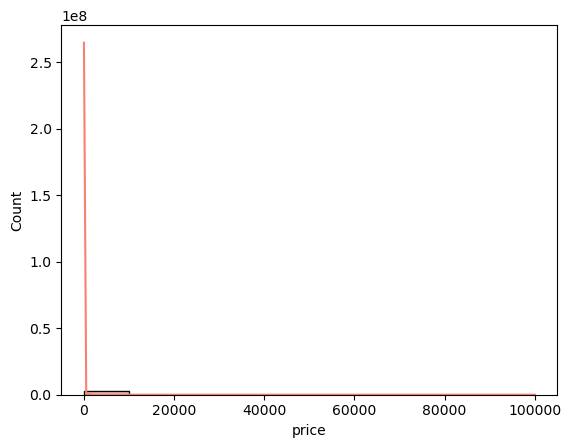

In [17]:
# 3 Visualizations:
#Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
#If its hard to read these diagrams, think why this is, and explain how it could be solved..

sns.histplot(df['price'], kde=True, bins=10, color="salmon")

#la valeur max fausse le resultat 

(0.0, 1000.0)

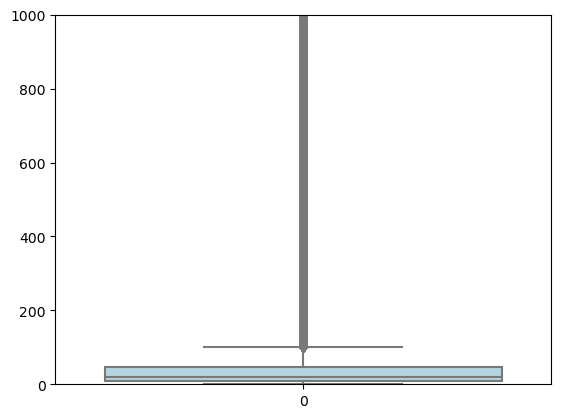

In [18]:
#Are there products that are priced significantly higher than the rest?
#yes the max fausse tout
#Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(data = df['price'], color="lightblue")
plt.ylim(0, 1000)

In [19]:


mean_rating = round(df['stars'].mean(), 2)
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()

display (mean_rating, median_rating, mode_rating)

#généralement les gens ne sont pas satisfait 


2.15

0.0

0    0.0
Name: stars, dtype: float64

In [20]:
#2 - Measures of Dispersion:

#Determine the variance, standard deviation, and interquartile range for product rating.
variance_rating = round(df['stars'].var(),2)
std_dev_rating = round(df['stars'].std(),2)
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

display(variance_rating, std_dev_price, range_rating , quantiles_rating)

#pas su commmenter 

4.82

345.61

5.0

0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

In [21]:
#4 - Shape of the Distribution:  Calculate the skewness and kurtosis for the rating column.

skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

<Axes: xlabel='stars', ylabel='Count'>

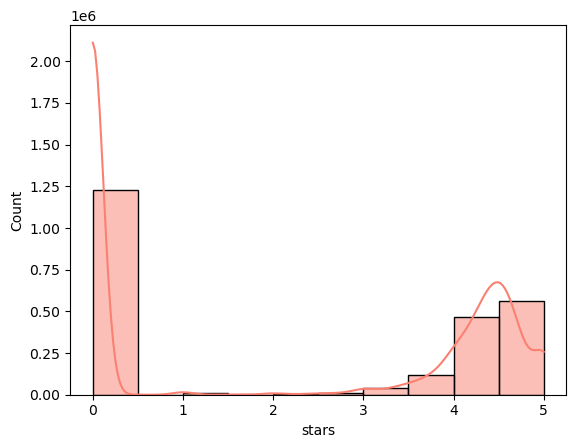

In [22]:
# Visualizations: Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df['stars'], kde=True, bins=10, color="salmon")